In [4]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np


In [5]:
img = cv2.imread('./Images/strength.jpg')

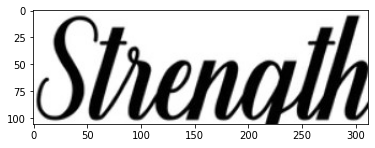

In [6]:
plt.imshow(img)

In [4]:
img_grayscale = cv2.cvtColor (img,cv2.COLOR_BGR2GRAY)


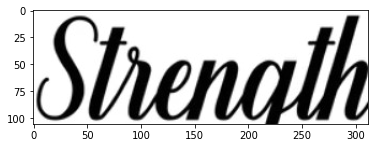

In [5]:
plt.imshow(img_grayscale/255.0,cmap='gray')

In [6]:
adaptive_thresh = cv2.adaptiveThreshold(img_grayscale,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,3)
cv2.imshow('AdaptiveThresholding',adaptive_thresh);
cv2.waitKey(0);


In [7]:
import numpy as np
 
# Create an image with text on it
img = adaptive_thresh
img1 = img.copy()
 
# Structuring Element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# Create an empty output image to hold values
thin = np.zeros(img.shape,dtype='uint8')
 
# Loop until erosion leads to an empty set
while (cv2.countNonZero(img1)!=0):
    # Erosion
    erode = cv2.erode(img1,kernel)
    # Opening on eroded image
    opening = cv2.morphologyEx(erode,cv2.MORPH_OPEN,kernel)
    # Subtract these two
    subset = erode - opening
    # Union of all previous sets
    thin = cv2.bitwise_or(subset,thin)
    # Set the eroded image for next iteration
    img1 = erode.copy()
    
cv2.imshow('original',img)
cv2.imshow('thinned',thin)
cv2.waitKey(0)

-1

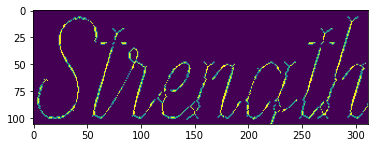

In [8]:
plt.imshow(thin)

In [9]:
vertical_word_hist = np.sum(thin,axis=0)/255


In [10]:
vertical_word_hist.shape

(312,)

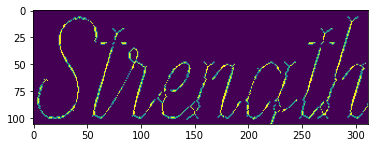

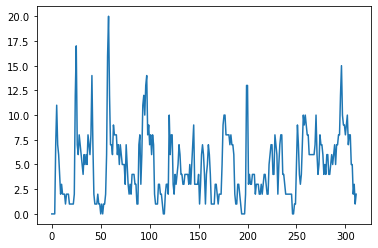

In [11]:
plt.imshow(thin)
plt.show()
plt.plot(vertical_word_hist)

In [12]:
word_info = []
j =0 
for i in vertical_word_hist:
    if i==0:
       word_info.append('gap')  
    elif i>0 and i<2:
        word_info.append('psc')
    else:
        word_info.append('word')
    j += 1

In [13]:
word_info

['gap',
 'gap',
 'gap',
 'gap',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'psc',
 'word',
 'word',
 'word',
 'psc',
 'psc',
 'psc',
 'psc',
 'psc',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'psc',
 'psc',
 'psc',
 'word',
 'psc',
 'psc',
 'gap',
 'psc',
 'gap',
 'psc',
 'psc',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'psc',
 'psc',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'word',
 'psc',
 'psc',
 'psc',
 'word',
 'word',
 'word',
 'word',
 'psc',


In [14]:
a=0
for i in word_info:
    if i=='psc':
        a+=1
    

In [15]:
img.shape

(106, 312)

In [16]:
height, width =img.shape

In [17]:
x1= 0
x2 = 0
y1 =0
y2 = 106
for i in word_info:
    if i=='psc':
        cv2.line(thin,(x1,y1),(x2,y2),(255,0,0),thickness=2)
    x1 +=1
    x2 +=1

In [18]:
cv2.imshow('PSCs',thin)
cv2.waitKey(0)

-1